# Numerical Analysis for Non-Linear Optimization | Module 1

## Table of Contents
1. **Introduction**  
2. **Pseudo and Quasi-Random Numbers**  
   2.1 [Pseudo-Random Numbers (PRNs)](#21-pseudo-random-numbers-prns)  
   2.2 [Quasi-Random Numbers (QRNs)](#22-quasi-random-numbers-qrns)  
   2.3 [Applications of PRNs and QRNs](#23-applications-of-prns-and-qrns)  
   2.4 [Comparison of PRNs and QRNs](#24-comparison-of-prns-and-qrns)  
   2.5 [Exercises for Section 2](#25-exercises-for-section-2)  
3. **Random Number Generators: Implementation and Applications**  
   3.1 [Using NumPy’s Modern PRNG API](#31-using-numpys-modern-prng-api)  
   3.2 [Generating Secure Random Numbers](#32-generating-secure-random-numbers)  
4. **Statistical Analysis & Testing Randomness**  
   4.1 [Kolmogorov-Smirnov Test for Uniformity](#41-kolmogorov-smirnov-test-for-uniformity)  
   4.2 [Visualization: Histogram and Distribution](#42-visualization-histogram-and-distribution)  
5. **Monte Carlo Simulations & Efficiency Enhancements**  
   5.1 [Estimating π Using Monte Carlo](#51-estimating-π-using-monte-carlo)  
   5.2 [Monte Carlo Convergence Analysis](#52-monte-carlo-convergence-analysis)  
6. **Real-World Applications of Random Number Generators**  
   6.1 [Financial Modeling: Stock Price Simulation Using Brownian Motion](#61-financial-modeling-stock-price-simulation-using-brownian-motion)  
7. **Best Samples, Antithetic Variables, and Moment Control Techniques**  
   7.1 [Best Samples: Enhancing Estimation Accuracy](#71-best-samples-enhancing-estimation-accuracy)  
   7.2 [Antithetic Variables: Correlation for Variance Reduction](#72-antithetic-variables-correlation-for-variance-reduction)  
8. **Applications in Monte Carlo Simulations**  
   8.1 [Estimating the Price of a European Call Option (Variance Reduction)](#81-estimating-the-price-of-a-european-call-option-variance-reduction)  
9. **Conclusion**  
10. **Consolidated Exercises**  

---

## 1. Introduction

Monte Carlo methods and random number generators are foundational to **scientific computing**, **optimization**, and **risk analysis**. These techniques let us approximate deterministic problems via stochastic sampling, and they also appear in areas like **finance**, **engineering**, and **machine learning**.  

In the following sections, we cover:  
- The distinction between **pseudo-random** and **quasi-random** numbers.  
- Practical implementation of random number generation using **NumPy** and Python’s **`secrets`** module.  
- Methods for validating randomness (e.g., **Kolmogorov-Smirnov** tests, histograms).  
- Applications of **Monte Carlo simulations** for estimating constants (like \(\pi\)) and solving real-world problems.  
- Advanced techniques for **variance reduction** (e.g., **antithetic variables**, **best sample selection**, **moment control**).  

---

## 2. Pseudo and Quasi-Random Numbers

### 2.1 Pseudo-Random Numbers (PRNs)

**Pseudo-random numbers** are generated by deterministic algorithms that aim to mimic randomness. Although they pass many statistical tests for randomness, they do have a period and are entirely determined by an initial *seed*.

**Key Characteristics**  
- **Deterministic & Reproducible**: Same seed \(\implies\) same sequence.  
- **Statistically random**: Appear random but eventually repeat.  
- **Uniform distribution**: Most PRNGs produce values in \([0,1)\).  

**Common PRNG Algorithms**  
- **Linear Congruential Generator (LCG)**:  
  \[
  X_{n+1} = (aX_n + c) \bmod m.
  \]  
- **Mersenne Twister**: Default PRNG in NumPy (period \(\approx 2^{19937}-1\)).  
- **Xoshiro / SplitMix**: Modern, high-quality PRNGs.  
- **PCG (Permuted Congruential Generator)**: Combines speed and excellent statistical properties.

#### Example: PRNG in Python

In [1]:
import numpy as np

# Initialize with seed for reproducibility
rng = np.random.default_rng(42)
random_numbers = rng.random(10)
print(random_numbers)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


---

### 2.2 Quasi-Random Numbers (QRNs)

**Quasi-random numbers** are low-discrepancy sequences that fill the sample space more uniformly than typical pseudo-random sequences. They are powerful in numerical integration and high-dimensional sampling, as they reduce clustering and can improve convergence rates.

**Key Characteristics**  
- **Low discrepancy**: Points are more uniformly spread.  
- **Deterministic**: But no conventional “period” like PRNGs.  
- **Ideal for integration/optimization**: Especially in moderately high dimensions.

**Common QRN Sequences**  
- **Sobol**: Often used for high-dimensional integrals.  
- **Halton**: Good for lower dimensions.  
- **Faure**: Similar to Halton but sometimes more uniform.

#### Example: Sobol in Python

In [2]:
from scipy.stats.qmc import Sobol

# Generate 10 Sobol points in 2D
sobol = Sobol(d=2, scramble=False)
qrn_points = sobol.random(n=10)
print(qrn_points)

[[0.     0.    ]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.25   0.75  ]
 [0.375  0.375 ]
 [0.875  0.875 ]
 [0.625  0.125 ]
 [0.125  0.625 ]
 [0.1875 0.3125]
 [0.6875 0.8125]]


/home/julihocc/ma2008b/notes.worktrees/FJ2025/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


---

### 2.3 Applications of PRNs and QRNs

#### Monte Carlo Integration with PRNs

In [3]:
def monte_carlo_integral_prn(f, a, b, n):
    rng = np.random.default_rng(42)
    x = rng.uniform(a, b, n)  
    return (b - a) * np.mean(f(x))

def f(x):
    return np.exp(-x**2)

print("MC Integral (PRN):", monte_carlo_integral_prn(f, 0, 1, 10000))

MC Integral (PRN): 0.7489294662980638


#### Monte Carlo Integration with QRNs

In [4]:
from scipy.stats.qmc import Halton

def monte_carlo_integral_qrn(f, a, b, n):
    halton = Halton(d=1, scramble=False)
    x = halton.random(n) * (b - a) + a  # Scale to [a,b]
    return (b - a) * np.mean(f(x))

print("MC Integral (QRN):", monte_carlo_integral_qrn(f, 0, 1, 10000))

MC Integral (QRN): 0.7469319729301906


#### Quasi-Random Sampling for Optimization

In [5]:
from scipy.stats.qmc import Sobol

def sobol_sampling(dim, num_samples):
    sampler = Sobol(d=dim, scramble=False)
    return sampler.random(n=num_samples)

samples = sobol_sampling(3, 10)  # 10 samples in 3D
print(samples)

[[0.     0.     0.    ]
 [0.5    0.5    0.5   ]
 [0.75   0.25   0.25  ]
 [0.25   0.75   0.75  ]
 [0.375  0.375  0.625 ]
 [0.875  0.875  0.125 ]
 [0.625  0.125  0.875 ]
 [0.125  0.625  0.375 ]
 [0.1875 0.3125 0.9375]
 [0.6875 0.8125 0.4375]]


---

### 2.4 Comparison of PRNs and QRNs

| Feature                     | Pseudo-Random Numbers | Quasi-Random Numbers      |
|-----------------------------|-----------------------|---------------------------|
| **Generation**             | Algorithm-based       | Deterministic sequence    |
| **Periodicity**            | Yes                   | No                        |
| **Uniformity**             | Moderate              | High                      |
| **Efficiency in Integration** | Lower               | Higher                    |
| **Usage**                  | General simulations   | Integration, optimization |

---

### 2.5 Exercises for Section 2

1. **Implement an LCG**: Generate 1000 pseudo-random numbers using a basic **Linear Congruential Generator** and plot their histogram.  
2. **Halton vs. Sobol**: Generate and plot **Halton** and **Sobol** sequences in 2D. Compare their distribution visually.  
3. **Compare Monte Carlo Convergence**:  
   - Use PRNs (Mersenne Twister) to compute \(\int_0^1 \sin(x)\,dx\).  
   - Use a Quasi-Random sequence (Sobol or Halton) for the same integral.  
   - Compare how quickly each approach converges.  
4. **High-Dimensional Optimization**: Use **QRNs** (e.g., Sobol) to optimize a 5D function (like a Rosenbrock variant) and compare with a purely random search in terms of required samples/time.

---

## 3. Random Number Generators: Implementation and Applications

While section 2 introduced PRNs vs. QRNs conceptually, this section focuses on **practical usage** in Python’s standard toolchain.

### 3.1 Using NumPy’s Modern PRNG API

In [6]:
import numpy as np

# Fixed seed for reproducibility
rng = np.random.default_rng(42)
rand_nums = rng.random(10)
print(rand_nums)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


### 3.2 Generating Secure Random Numbers

In [7]:
import secrets
import string

def generate_password(length=12):
    chars = string.ascii_letters + string.digits + string.punctuation
    return "".join(secrets.choice(chars) for _ in range(length))

print("Secure Password:", generate_password())

Secure Password: YI4g-HF)3a_D


---

## 4. Statistical Analysis & Testing Randomness

To ensure generated numbers behave “randomly,” we use statistical tests and visual methods.

### 4.1 Kolmogorov-Smirnov Test for Uniformity

In [8]:
from scipy.stats import kstest

samples = rng.random(1000)
ks_stat, p_value = kstest(samples, "uniform")
print(f"KS Test Statistic: {ks_stat}, P-value: {p_value}")

KS Test Statistic: 0.023093132123466364, P-value: 0.6516710583520398


### 4.2 Visualization: Histogram and Distribution

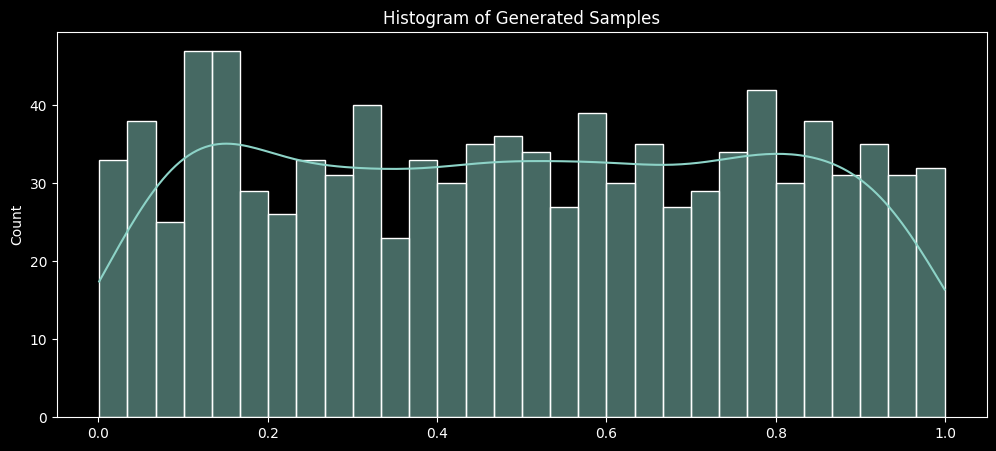

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(samples, bins=30, kde=True)
plt.title("Histogram of Generated Samples")
plt.show()

---

## 5. Monte Carlo Simulations & Efficiency Enhancements

Monte Carlo methods use randomness to approximate deterministic problems.

### 5.1 Estimating π Using Monte Carlo

In [10]:
from numba import njit, prange
import numpy as np

@njit(parallel=True)
def monte_carlo_pi(n):
    count = 0
    for i in prange(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            count += 1
    return (count / n) * 4

print("Estimated Pi:", monte_carlo_pi(1_000_000))

Estimated Pi: 3.140684


### 5.2 Monte Carlo Convergence Analysis

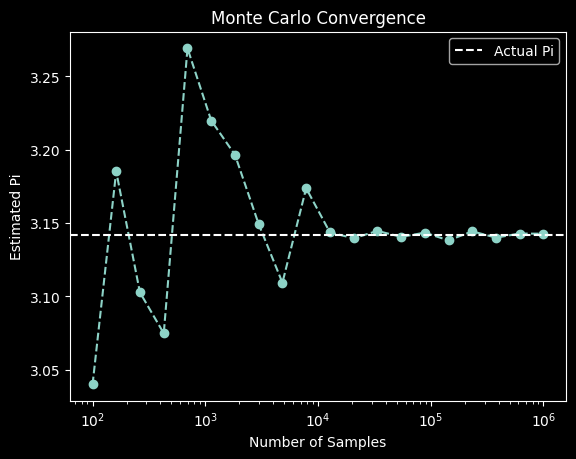

In [11]:
import matplotlib.pyplot as plt
import numpy as np

n_values = np.logspace(2, 6, num=20, dtype=int)
pi_estimates = [monte_carlo_pi(n) for n in n_values]

plt.plot(n_values, pi_estimates, marker="o", linestyle="dashed")
plt.xscale("log")
plt.axhline(y=np.pi, linestyle="--", label="Actual Pi")
plt.xlabel("Number of Samples")
plt.ylabel("Estimated Pi")
plt.legend()
plt.title("Monte Carlo Convergence")
plt.show()

---

## 6. Real-World Applications of Random Number Generators

### 6.1 Financial Modeling: Stock Price Simulation Using Brownian Motion

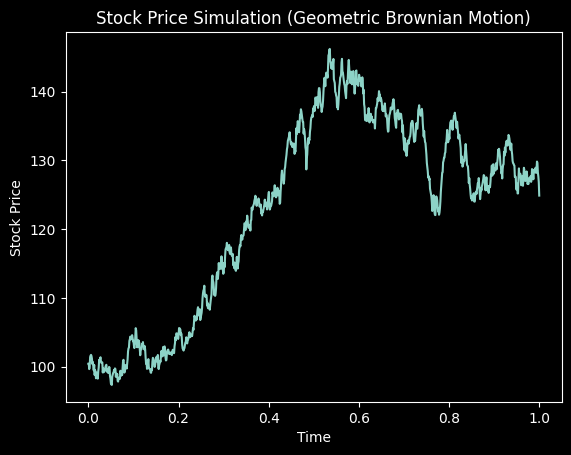

In [12]:
import numpy as np
import matplotlib.pyplot as plt

T, N, S0, mu, sigma = 1, 1000, 100, 0.05, 0.2
dt = T / N
t = np.linspace(0, T, N)
brownian_motion = np.cumsum(np.random.randn(N) * np.sqrt(dt))

stock_prices = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * brownian_motion)
plt.plot(t, stock_prices)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation (Geometric Brownian Motion)")
plt.show()

---

## 7. Best Samples, Antithetic Variables, and Moment Control Techniques

### 7.1 Best Samples: Enhancing Estimation Accuracy
- **Importance Sampling**: Weighs samples by their PDF to reduce variance in regions of interest.  
- **Stratified Sampling**: Divides the domain into strata, sampling each proportionally.  
- **Quasi-Random Sequences**: (See Section 2.2) Reduce clustering and often improve integration efficiency.

### 7.2 Antithetic Variables: Correlation for Variance Reduction

By pairing each random draw \(X_i\) with a negatively correlated draw \(X_i^*\), you can reduce variance.  
**Example**: \(X_i^* = 1 - X_i\) for a uniform distribution.

In [13]:
import numpy as np

def monte_carlo_pi_antithetic(n):
    u = np.random.random(n // 2)
    v = 1 - u
    x = np.concatenate((u, v))
    y = np.random.random(n)
    inside_circle = (x**2 + y**2) <= 1
    return (np.sum(inside_circle) / n) * 4

print("Estimated Pi (Antithetic):", monte_carlo_pi_antithetic(1_000_000))

Estimated Pi (Antithetic): 3.143352


---

## 8. Applications in Monte Carlo Simulations

### 8.1 Estimating the Price of a European Call Option (Variance Reduction)

In [14]:
import numpy as np

def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T
    U = np.random.normal(0, 1, num_simulations // 2)
    V = -U  # Antithetic pairs
    Z = np.concatenate((U, V))
    
    ST = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff = np.maximum(ST - K, 0)
    discounted_payoff = np.exp(-r * T) * payoff
    
    mean_price = np.mean(discounted_payoff)
    sem = np.std(discounted_payoff) / np.sqrt(num_simulations)
    return mean_price, sem

# Parameters
S0, K, T, r, sigma, num_sims = 100, 100, 1, 0.05, 0.2, 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, num_sims)
print(f"European Call Option Price: {call_price:.4f} ± {error:.4f}")

European Call Option Price: 10.4330 ± 0.0465


---

## 9. Conclusion

Random number generation and Monte Carlo simulations are cornerstones of **numerical analysis** and **non-linear optimization**. By understanding the difference between **pseudo-random** and **quasi-random** approaches—and by incorporating **variance reduction** techniques like **best samples**, **antithetic variables**, and **moment control**—you can achieve more efficient, reliable, and faster convergence in a wide range of applications.

---

## 10. Consolidated Exercises

Below is a combined set of exercises from all three notes. They range from basic random sampling to advanced variance reduction and financial applications.

1. **Basic Random Number Generation**  
   - Generate a \(10 \times 10\) array of uniform random numbers. Compute its mean and standard deviation.  
   - Generate 20 random integers between 1 and 10 and count their frequencies.  

2. **Pseudo & Quasi-Random Implementation**  
   - Implement a **Linear Congruential Generator (LCG)** in Python for 1000 samples and plot their histogram.  
   - Generate **Halton** and **Sobol** sequences in 2D; plot and compare their distribution.  

3. **Statistical Distributions & Tests**  
   - Generate and plot samples from exponential and binomial distributions.  
   - Perform a KS test on a sample of normally distributed random numbers.  

4. **Monte Carlo Integration**  
   - Implement a Monte Carlo integration for \(\int_0^1 \sin(x)\,dx\). Compare its accuracy with a standard numerical integration.  
   - Repeat the integration using **quasi-random** (Sobol/Halton) samples. Compare convergence.  

5. **Antithetic Variables**  
   - Implement a Monte Carlo estimator for a *normal* random variable (e.g., \(\mathbb{E}[X]\) for \(X \sim \mathcal{N}(0,1)\)) using antithetic variables.  
   - Compare variance to a straightforward (independent) Monte Carlo approach.  

6. **Advanced Applications**  
   - Apply **moment control** techniques (e.g., controlling first and second moments) to estimate European call option prices. Compare to a plain Monte Carlo approach.  
   - Modify a Monte Carlo simulation for **stochastic differential equations (SDEs)** (e.g., using Euler-Maruyama) while applying **variance reduction** methods.  
   - Use **QRNs** for high-dimensional optimization (e.g., 5D Rosenbrock function) and compare against purely random sampling.